In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Importing data from output file of data extracter

In [4]:
measurements = np.load('Dataset_Extractor\\2_bicyclist_data.npz', allow_pickle=True)['arr_0']

# Downsampling and clustering data 

In [5]:
Xsamp = measurements[19] #measurement[i] i is the data from 1 textfile
sampling = 10
total_num_of_points=100000


#downsampling to only 12k points out of 120k
Xthres=[]
for j in range(0,total_num_of_points, sampling):
        Xthres.append(Xsamp[j])
X = pd.DataFrame(Xthres)

#removing ground and clipping xy plane 20X20
X = X.loc[(X[2]>-1)&(X[0]<20)&(X[0]>-20)&(X[1]<20)&(X[1]>-20)]


#clustering trimmed data
db = DBSCAN(eps=0.7, min_samples=15).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Assigning index to clusters
X[4] = labels
X = X.to_numpy()

# Visualisation of Clusters

In [6]:


def plot(a):

#ploting clusters in xy plane
    if (a == 'xy'):
        import matplotlib.pyplot as plt
        %matplotlib inline

        unique_labels = set(labels)
        unique_labels.remove(-1)
        print(unique_labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor=tuple(col), markersize=1)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor=tuple(col), markersize=1)

        plt.title('Estimated number of clusters: %d' % n_clusters_)
        plt.show()

#ploting clusters in yz plane  
    if (a == 'yz'):
        import matplotlib.pyplot as plt
        %matplotlib inline
        
        unique_labels = set(labels)
        unique_labels.remove(-1)
        print(unique_labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 1], xy[:, 2], 'o', markerfacecolor=tuple(col),
                     markeredgecolor=tuple(col), markersize=1)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 1], xy[:, 2], 'o', markerfacecolor=tuple(col),
                     markeredgecolor=tuple(col), markersize=1)

        plt.title('Estimated number of clusters: %d' % n_clusters_)
        plt.show()

#ploting clusters in xz plane
    if (a == 'xz'):
        import matplotlib.pyplot as plt
        %matplotlib inline

        unique_labels = set(labels)
        unique_labels.remove(-1)
        print(unique_labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 2], 'o', markerfacecolor=tuple(col),
                     markeredgecolor=tuple(col), markersize=1)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 2], 'o', markerfacecolor=tuple(col),
                     markeredgecolor=tuple(col), markersize=1)

        plt.title('Estimated number of clusters: %d' % n_clusters_)
        plt.show()  

{0, 1, 2}


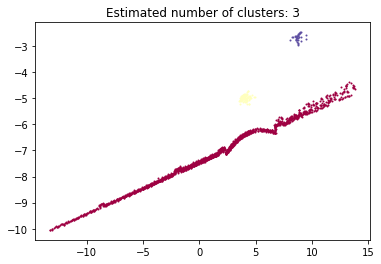

{0, 1, 2}


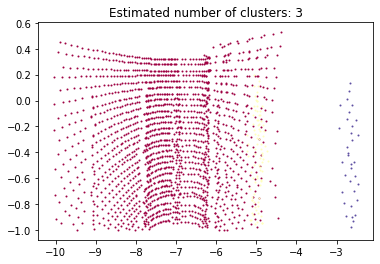

{0, 1, 2}


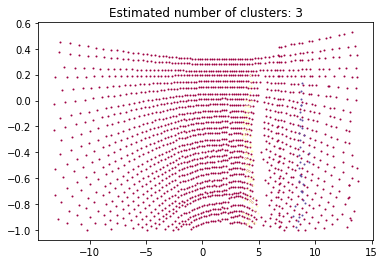

In [7]:
plot('xy')
plot('yz')
plot('xz')

# Mean of clusters
1. Creating dataframe to store mean of each Cluster
2. Ploting mean and x,y axis

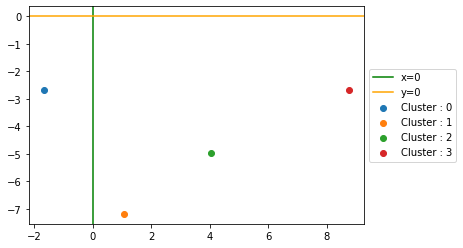

In [8]:
import matplotlib.pyplot as plt

#Mean of a cluster
X = pd.DataFrame(X)
Xmean=[]
for j in range(-1,n_clusters_):
    Y=X.loc[(X[4]==j)].mean()
    Xmean.append(Y)
    plt.scatter(Y[0],Y[1],label="Cluster : {}".format(j+1))
Xmean=pd.DataFrame(Xmean)


plt.axvline(x=0, c="green", label="x=0")
plt.axhline(y=0, c="orange", label="y=0")

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()